In [0]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/My\ Drive/Computer\ Vision/Assignment\ 1

/content/drive/My Drive/Computer Vision/Assignment 1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

In [0]:
image = cv2.imread('image_3.png', cv2.IMREAD_GRAYSCALE)

def salt_pepper_noise(orig_image, level=0.1):
    nimage = np.copy(orig_image)
    num_pixels = np.ceil(level * image.shape[0]*image.shape[1])
    coords = [np.random.randint(0, i - 1, int(num_pixels)) for i in image.shape[:2]]
    white = [coords[0][:int(num_pixels/2)],coords[1][:int(num_pixels/2)]]       
    black = [coords[0][int(num_pixels/2):],coords[1][int(num_pixels/2):]]
    nimage[black]=0
    nimage[white]=255
    return nimage


([], <a list of 0 Text yticklabel objects>)

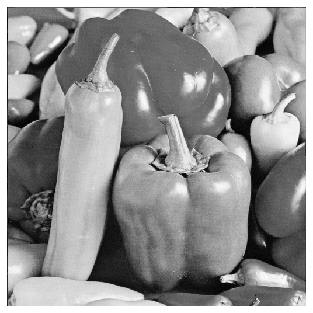

In [23]:
image=image
plt.imshow(image, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

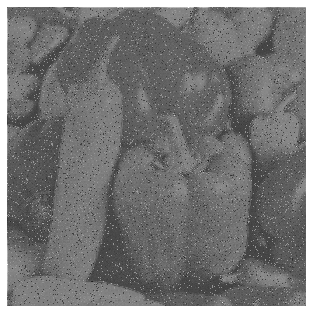

In [24]:
noised_image = salt_pepper_noise(image, level=0.1)
laplacian = cv2.Laplacian(image,cv2.CV_64F)
final_im = noised_image + laplacian
# final_im = np.interp(final_im, (final_im.min(), final_im.max()), (0, 1))
plt.imshow(final_im, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

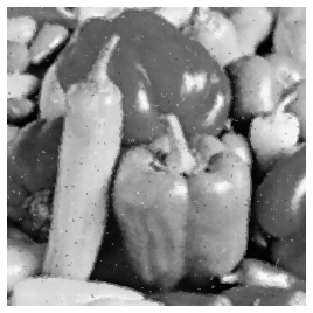

In [27]:
# coeffs2 = pywt.dwt2(final_im, 'haar')
# LL, (LH, HL, HH) = coeffs2

# new_coeffs = LL, (np.zeros(LH.shape), np.zeros(HL.shape), np.zeros(HH.shape))

coeffs2 = pywt.wavedec2(final_im,'haar', level = 1)

for i in range(1, len(coeffs2)):
#     a = coeffs2[i][0]
#     a[a <= np.std(a)*np.sqrt(2*np.log(a.shape[0]*a.shape[1]))] = 0
#     b = coeffs2[i][1]
#     b[b <= np.std(b)*np.sqrt(2*np.log(b.shape[0]*b.shape[1]))] = 0
#     c = coeffs2[i][2]
#     c[c <= np.std(c)*np.sqrt(2*np.log(c.shape[0]*c.shape[1]))] = 0
#     coeffs2[i] = tuple([a,b,c])
    coeffs2[i] = tuple([np.zeros_like(v) for v in coeffs2[i]])
    
coeffs2[0] = cv2.medianBlur(np.float32(coeffs2[0]),3)
    
recon = pywt.waverec2(coeffs2, 'haar')
plt.imshow(recon, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

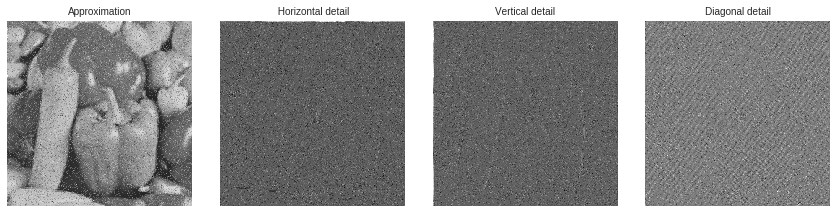

In [0]:
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

In [0]:
recon = pywt.idwt2(new_coeffs, 'haar')

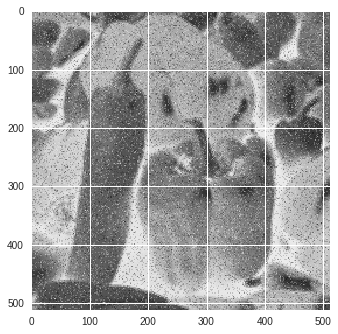

In [0]:
plt.imshow(recon)